In [8]:
import sklearn
from sklearn.datasets import load_digits

X, y =load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

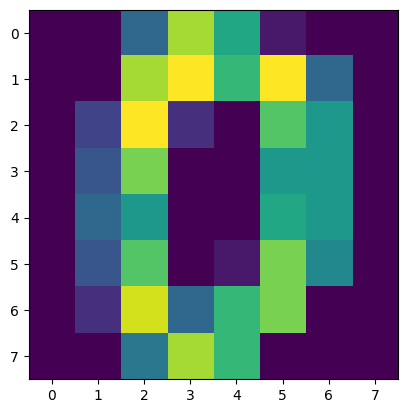

In [9]:
import matplotlib.pyplot as plt
reshaped_arr = X[0].reshape(8,8)
plt.imshow(reshaped_arr )

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
clf.score(X_test, y_test)

0.9629629629629629

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593

In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist


Cloning into 'fashion-mnist'...


In [15]:
%cd fashion-mnist

c:\Users\giuli\Documents\GitHub\ML_DL_LABS\Lab1\fashion-mnist


In [16]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

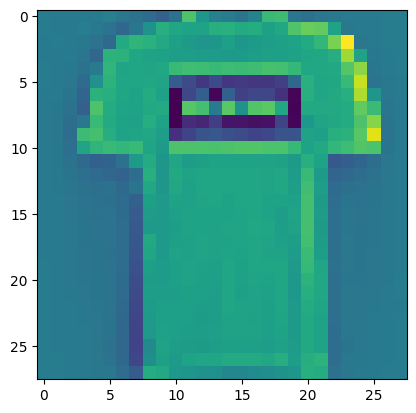

In [17]:
first_class = X_train[y_train==0,:] #select the first class
std = StandardScaler() 
first_class = std.fit_transform(first_class)#standardize data
plt.imshow(first_class[0,:].reshape(28,28)) #show a sample image



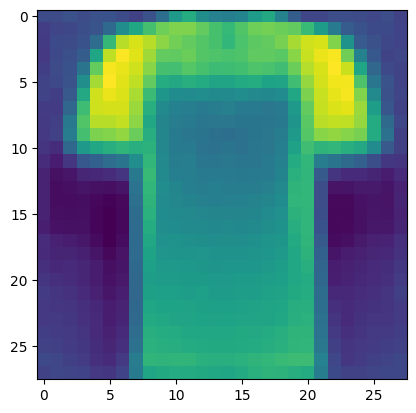

In [18]:
pca = PCA(n_components=6)
first_class_projection = pca.fit_transform(first_class) #project data onto the subspace generated by the first 6 components
reprojected_data=pca.inverse_transform(first_class_projection) #inverse the projection back to the original n-dimensional space
plt.imshow(reprojected_data[0,:].reshape(28,28)) #see what happened to the same image



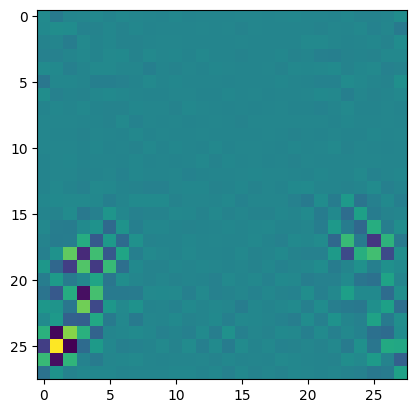

In [19]:
import numpy as np
pca_full = PCA()
pca_full.fit(first_class) #fit the pca with all principal components
V = pca_full.components_[-6:, :] #select the LAST 6 principal components (NB the matrix is transposed)
X_t = np.matmul(first_class, np.transpose(V)) #project data in the subspace generated by the last 6 PC
X_t_t = np.matmul(X_t, V) #project back the data
plt.imshow(X_t_t[0,:].reshape(28,28))#see what happened

## Pythorch

In [20]:
import torch

In [21]:
n=100
t1 = torch.rand(size=(n,n,n,n))
t2 = torch.rand(size=(n,n,n,n))
t1.cuda()
t2.cuda()

tensor([[[[2.5179e-01, 7.3955e-01, 4.4180e-03,  ..., 8.8516e-01,
           2.6883e-01, 9.1288e-01],
          [2.8396e-01, 4.3704e-01, 7.0790e-01,  ..., 9.4787e-01,
           9.9936e-01, 5.2307e-01],
          [1.1135e-01, 1.3763e-01, 7.0283e-01,  ..., 1.6898e-01,
           2.9250e-01, 9.3204e-02],
          ...,
          [4.6387e-01, 4.1001e-01, 2.3150e-01,  ..., 1.5323e-01,
           7.9013e-01, 4.8075e-01],
          [2.8374e-03, 3.9629e-01, 2.6447e-01,  ..., 1.8602e-01,
           8.6294e-01, 6.7948e-02],
          [3.5876e-01, 8.9326e-01, 2.2680e-02,  ..., 4.0436e-01,
           9.6249e-01, 8.9107e-01]],

         [[2.3315e-01, 3.9424e-01, 5.4754e-01,  ..., 5.2939e-01,
           3.9981e-01, 3.0791e-01],
          [3.4677e-01, 7.9803e-01, 1.4462e-01,  ..., 4.2287e-01,
           1.9868e-01, 1.7126e-01],
          [6.2098e-01, 3.1698e-01, 9.8538e-01,  ..., 3.5857e-01,
           2.0406e-01, 5.1277e-01],
          ...,
          [1.6354e-01, 5.5725e-01, 4.7352e-01,  ..., 7.0598

In [22]:
t = torch.add(t1, t2) #sum between tensors
s = torch.sum(t1) #sum between all elements of tensor

In [23]:
t3 = torch.matmul(t1,t2)

In [24]:
%cd C:\Users\giuli\Documents\GitHub\ML_DL_LABS\Lab1

C:\Users\giuli\Documents\GitHub\ML_DL_LABS\Lab1


In [45]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch = unpickle('cifar-10-python/cifar-10-batches-py/data_batch_1')
batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

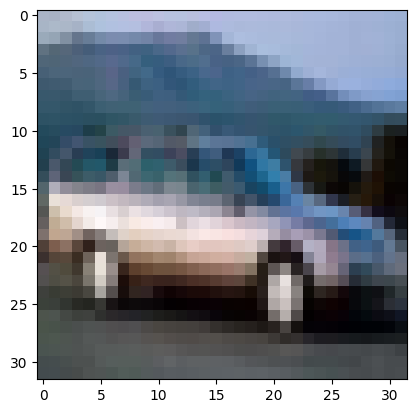

In [49]:
batch[b'data'].shape #10000 RGB images with 1024 pixels and 3 color channels (32*32*3)
image = batch[b'data'][4] #first image
image = image.reshape((3,32,32)) 
image = image.transpose(1,2,0) #necessary operations in order to format images the wight way
plt.imshow(image)
batch[b'labels'][5]
b =batch[b'data'].dtype

Class for CIFAR10 dataset


In [109]:
import torch
import pandas as pd
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np

class DatasetCIFAR(Dataset):
    def __init__(self, file_path):
        
        def unpickle(file):
            import pickle
            with open(file, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
            return dict

        self.data = np.empty([1, 32, 32, 3], dtype=int)
        self.labels = np.empty(1, dtype=int)        
        for file in file_path:
            batch = unpickle(file)
            data_tmp = batch[b'data'].reshape(len(batch[b'data']), 3, 32, 32).transpose(0,2,3,1)
            labels_tmp = batch[b'labels']
            self.data = np.append(self.data, data_tmp, axis=0) 
            self.labels = np.append(self.labels, labels_tmp, axis = 0) 
        
        self.data = self.data[1:,:,:,:]
        self.labels = self.labels[1:]
        

    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        image =self.data[index] 
        label = self.labels[index]
        return image, label

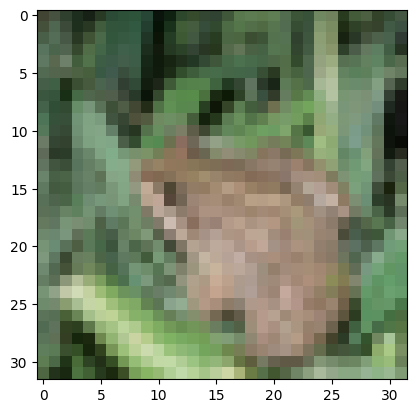

In [110]:
trainset = DatasetCIFAR(['cifar-10-python/cifar-10-batches-py/data_batch_1',
                       'cifar-10-python/cifar-10-batches-py/data_batch_2',
                       'cifar-10-python/cifar-10-batches-py/data_batch_3',
                       'cifar-10-python/cifar-10-batches-py/data_batch_4',
                       'cifar-10-python/cifar-10-batches-py/data_batch_5'])
testset = DatasetCIFAR(['cifar-10-python/cifar-10-batches-py/test_batch'])
img, label =testset[4]
plt.imshow(img)

In [112]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, batch_size=32)
testloader = DataLoader(testset, batch_size=32)